In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Magnetic fields from coils

In [16]:
u0 = 4*np.pi*10**(-7) # Magnetic permiability 
I = 10 # Current
R = np.linspace(1*10**(-2), 5*10**(-2)) # Range of coil radii to try for solenoid

Text(0.5, 0, 'Number of coils')

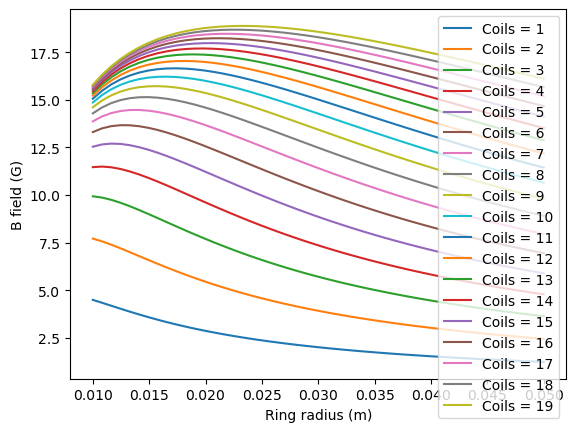

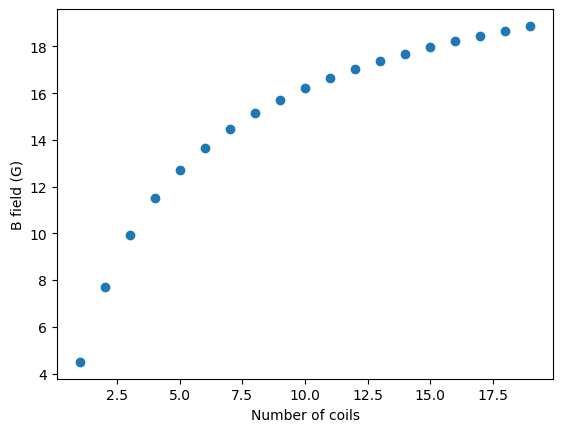

In [17]:
# calculating magnetic field of solenoid at particle
# I'm just calculating field from several current loops and summing them

z = 0.5*10**(-2) # distance of first coil from particle
Bmax = [] # Max field over different solenoid radii
ns = range(1, 20, 1) # Total number of coils
for n in ns:
    B = [] # Field for a range of radii
    for R0 in R:
        B_tmp2 = 0 # Total field for this radii
        for n0 in range(n):
            B_tmp = u0*I*R0**2/2/(R0**2+(z+(n0)*2.5*10**(-3))**2)**(3/2)/10**(-4) # field from coil n0
            B_tmp2 += B_tmp
        B.append(B_tmp2)
    Bmax.append(np.max(B))
    B = np.array(B)
    plt.plot(R, B, label = 'Coils = '+str(n))
plt.legend()
plt.ylabel('B field (G)')
plt.xlabel('Ring radius (m)')
plt.figure()
plt.plot(ns, Bmax, 'o')
plt.ylabel('B field (G)')
plt.xlabel('Number of coils')

Text(0.5, 0, 'Number of coils')

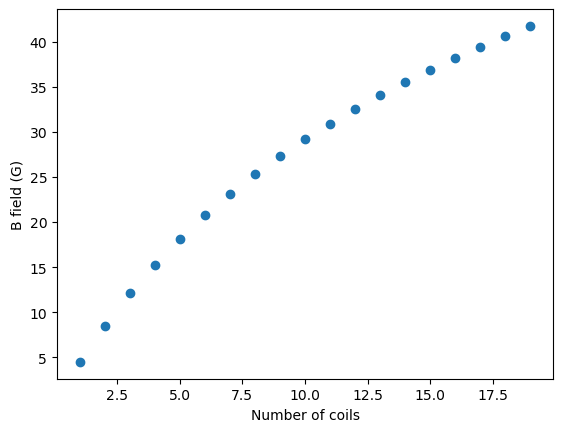

In [18]:
# Now calculating flattened coil
# Same as above just summing fields from individual current loops

z = 0.5*10**(-2) # Distance from particle
ns = range(1, 20, 1)
R0 = 0.01 # Smallest coil radius
B = [] # Magnetic field for each max coil number
for n in ns:
    B_tmp2 = 0
    for n0 in range(n):
        B_tmp = u0*I*(R0+(n0)*2.5*10**(-3))**2/2/((R0+(n0)*2.5*10**(-3))**2+z**2)**(3/2)/10**(-4) # Magnetic field from coil n0
        B_tmp2 += B_tmp
    B.append(B_tmp2)
plt.plot(ns, B, 'o')
plt.ylabel('B field (G)')
plt.xlabel('Number of coils')

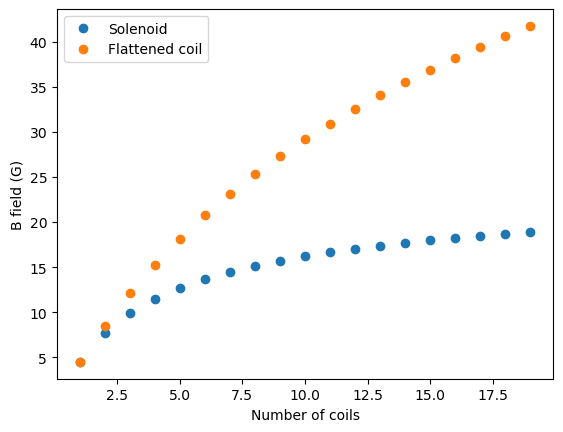

In [19]:
plt.plot(ns, Bmax, 'o', label = 'Solenoid')
plt.plot(ns, B, 'o', label = 'Flattened coil')
plt.ylabel('B field (G)')
plt.xlabel('Number of coils')
plt.legend()

### Lorentz force on particle

In [20]:
# Response of oscillator to driving field

w0 = 2*np.pi*250000 # central frequency
m = 4/3*np.pi*(83*10**(-9))**3*2200 # mass
B = 10**(-4)*20 # magnetic field in Tesla
q = 1.6*10**(-19)*10 # particle charge
EpV = 120 # electric field per volt
V = 200 # applied voltage
w = np.linspace(40000, 300000, 10**5)*2*np.pi # frequency range
y = 10*2*np.pi # Damping on particle

Fe = V*EpV*q # electric force
Svv = w*Fe/m/np.sqrt((w**2-w0**2)**2+y**2*w**2) # Velocity response in x
SffzB = Svv*q*B # force response in z from lorentz force

In [21]:
# Calculating force sensitivity from measured back action and imprecision

hbar = 1.055*10**(-34)
SI2eV = 5.34428599e-28

R = (0.083)*10**(-6) # Particle Radius
p = 2200 # Particle Denisty
M = 4/3*np.pi*R**3*p # Particle mass

def chi_sq(w, w0, y0, M):
    return M**2*((w0**2-w**2)**2+y0**2*w**2)

w = np.linspace(40000, 300000, 10**5)*2*np.pi

chi_sq1 = chi_sq(w, 60000*2*np.pi, y, M)

c = 3*10**8

Gamma = 6400*2*np.pi # Total reheating
Sba = hbar**2*Gamma/(hbar/2/M/2/np.pi/60000) # Total backaction noise
k = 2*np.pi/(1.064*10**(-6))
Pscatt = Sba*c/hbar/(0.83**2+0.4)/k # Equivalent scattered power
print(Sba)
print(Pscatt)
Simp = hbar*c/Pscatt/4/k/(0.83**2+0.4)/0.13 # Imprecision noise - I've fiddled around with collection efficiency until I get the measured value
print(Simp)

f = (Simp*chi_sq1 + (Sba+np.zeros(len(w)))) # force sensitivity

1.6854620704794595e-41
7.453522048686685e-06
1.2699382144498855e-27


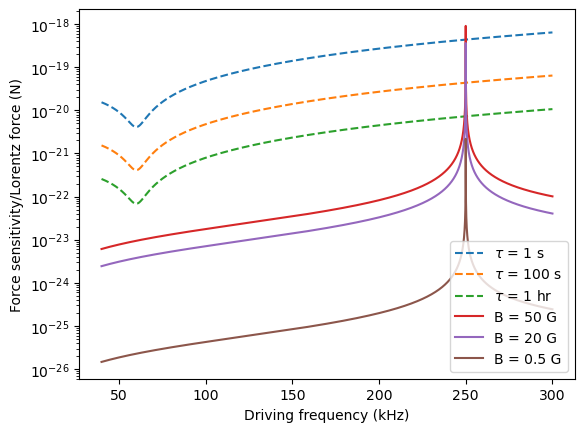

In [22]:
plt.plot(w/2/np.pi/1000, np.sqrt(f), '--', label = r'$\tau$ = 1 s')
plt.plot(w/2/np.pi/1000, np.sqrt(f)/np.sqrt(100), '--', label = r'$\tau$ = 100 s')
plt.plot(w/2/np.pi/1000, np.sqrt(f)/np.sqrt(3600), '--', label = r'$\tau$ = 1 hr')

plt.plot(w/2/np.pi/1000, SffzB*50/20, label = r'B = 50 G')
plt.plot(w/2/np.pi/1000, SffzB, label = r'B = 20 G')
plt.plot(w/2/np.pi/1000, SffzB/8.3/20, label = r'B = 0.5 G')

plt.ylabel('Force sensitivity/Lorentz force (N)')
plt.xlabel('Driving frequency (kHz)')
plt.yscale('log')
plt.legend()

(248.0, 252.0)

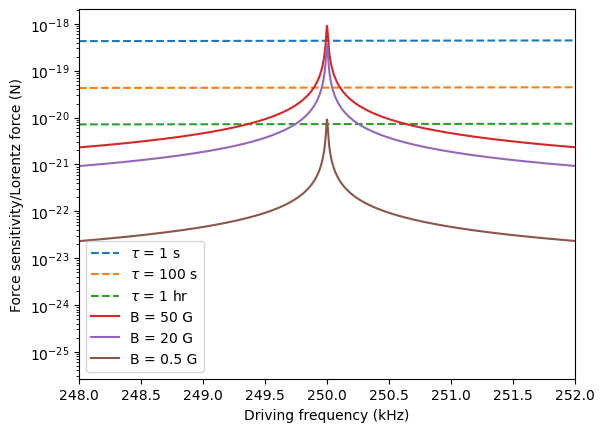

In [24]:
plt.plot(w/2/np.pi/1000, np.sqrt(f), '--', label = r'$\tau$ = 1 s')
plt.plot(w/2/np.pi/1000, np.sqrt(f)/np.sqrt(100), '--', label = r'$\tau$ = 100 s')
plt.plot(w/2/np.pi/1000, np.sqrt(f)/np.sqrt(3600), '--', label = r'$\tau$ = 1 hr')

plt.plot(w/2/np.pi/1000, SffzB*50/20, label = r'B = 50 G')
plt.plot(w/2/np.pi/1000, SffzB, label = r'B = 20 G')
plt.plot(w/2/np.pi/1000, SffzB/20/2, label = r'B = 0.5 G')

plt.yscale('log')
plt.ylabel('Force sensitivity/Lorentz force (N)')
plt.xlabel('Driving frequency (kHz)')
plt.legend()
plt.xlim(248, 252)

In [97]:
w0 = 2*np.pi*215000 # central frequency
m = 4/3*np.pi*(83*10**(-9))**3*2200 # mass
B = 10**(-4)*200 # magnetic field in Tesla
q = 1.6*10**(-19)*120 # particle charge
EpV = 120 # electric field per volt
V = 100 # applied voltage
w = np.linspace(40000, 300000, 10**5)*2*np.pi # frequency range
y = 10*2*np.pi # Damping on particle

Fe = V*EpV*q # electric force
Svv = w*Fe/m/np.sqrt((w**2-w0**2)**2+y**2*w**2) # Velocity response in x
Sxx = Svv/w
SffzB = Svv*q*B # force response in z from lorentz force

hbar = 1.055*10**(-34)
SI2eV = 5.34428599e-28

R = (0.083)*10**(-6) # Particle Radius
p = 2200 # Particle Denisty
M = 4/3*np.pi*R**3*p # Particle mass

def chi_sq(w, w0, y0, M):
    return M**2*((w0**2-w**2)**2+y0**2*w**2)

w = np.linspace(40000, 300000, 10**5)*2*np.pi

chi_sq1 = chi_sq(w, 50000*2*np.pi, y, M)

c = 3*10**8

Gamma = 6400*2*np.pi # Total reheating
Sba = hbar**2*Gamma/(hbar/2/M/2/np.pi/50000)*8 # Total backaction noise
k = 2*np.pi/(1.064*10**(-6))
Pscatt = Sba*c/hbar/(0.83**2+0.4)/k # Equivalent scattered power
print(Sba)
print(Pscatt)
Simp = hbar*c/Pscatt/4/k/(0.83**2+0.4)/0.01 # Imprecision noise - I've fiddled around with collection efficiency until I get the measured value
print(Simp)

f = (Simp*chi_sq1 + (Sba+np.zeros(len(w)))) # force sensitivity

1.1236413803196396e-40
4.969014699124457e-05
2.4763795181772763e-27


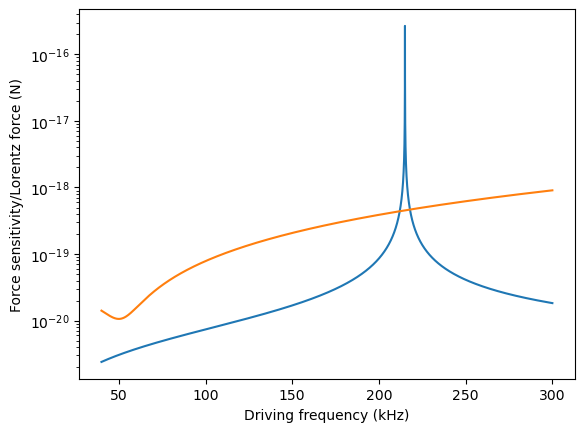

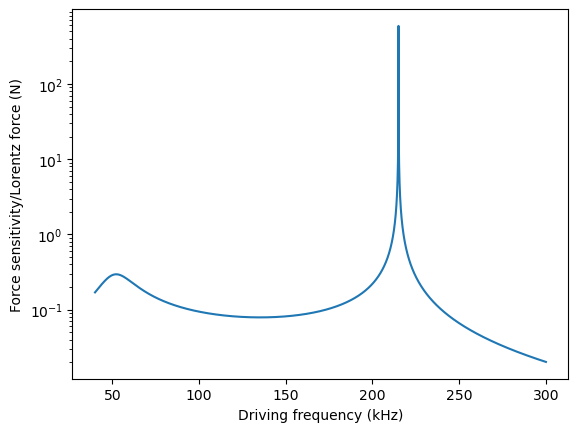

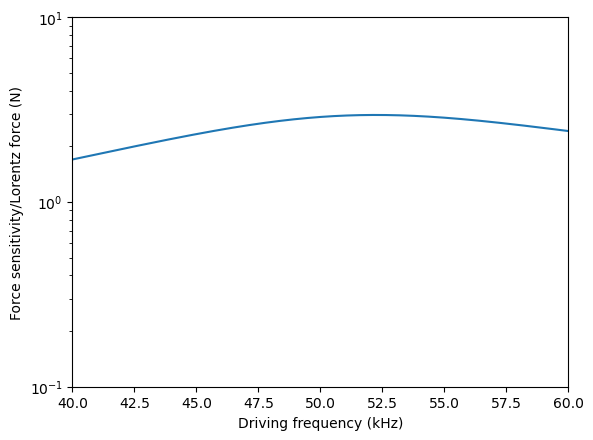

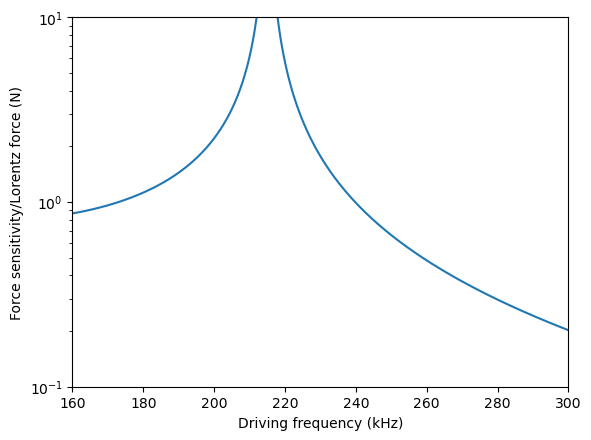

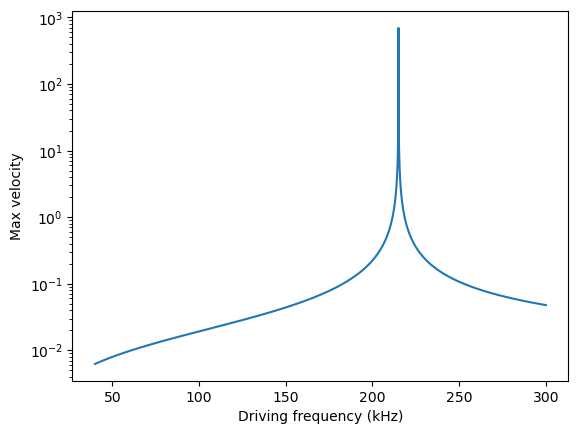

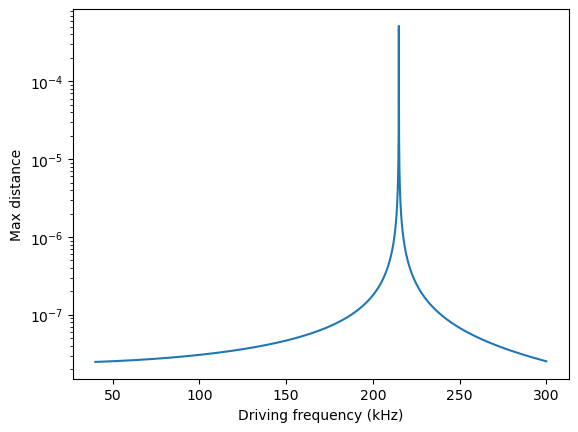

In [98]:


plt.plot(w/2/np.pi/1000, SffzB)
plt.plot(w/2/np.pi/1000, np.sqrt(f))

plt.ylabel('Force sensitivity/Lorentz force (N)')
plt.xlabel('Driving frequency (kHz)')
plt.yscale('log')
plt.figure()
plt.plot(w/2/np.pi/1000, SffzB/np.sqrt(f))

plt.ylabel('Force sensitivity/Lorentz force (N)')
plt.xlabel('Driving frequency (kHz)')
plt.yscale('log')
plt.figure()
plt.plot(w/2/np.pi/1000, SffzB/np.sqrt(f)*10)

plt.ylabel('Force sensitivity/Lorentz force (N)')
plt.xlabel('Driving frequency (kHz)')
plt.yscale('log')
plt.xlim(40, 60)
plt.ylim(0.1, 10)


plt.figure()
plt.plot(w/2/np.pi/1000, SffzB/np.sqrt(f)*10)

plt.ylabel('Force sensitivity/Lorentz force (N)')
plt.xlabel('Driving frequency (kHz)')
plt.yscale('log')
plt.xlim(160, 300)
plt.ylim(0.1, 10)

plt.figure()
plt.plot(w/2/np.pi/1000, Svv)

plt.ylabel('Max velocity')
plt.xlabel('Driving frequency (kHz)')
plt.yscale('log')

plt.figure()
plt.plot(w/2/np.pi/1000, Sxx)

plt.ylabel('Max distance')
plt.xlabel('Driving frequency (kHz)')
plt.yscale('log')

(170.0, 250.0)

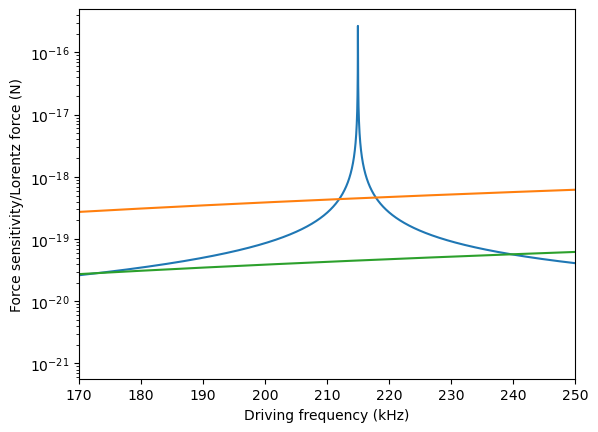

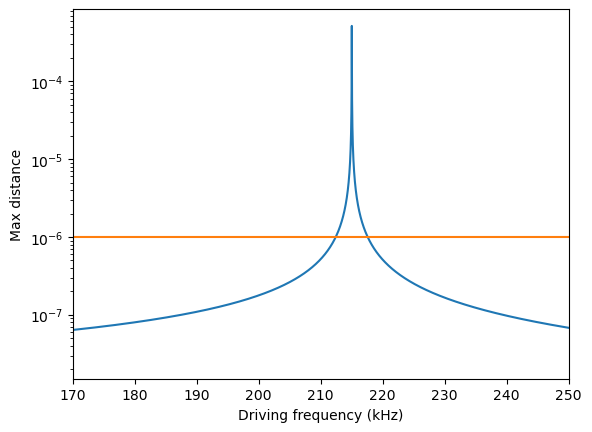

In [85]:

plt.plot(w/2/np.pi/1000, SffzB)
plt.plot(w/2/np.pi/1000, np.sqrt(f))
plt.plot(w/2/np.pi/1000, np.sqrt(f)/np.sqrt(100))

plt.ylabel('Force sensitivity/Lorentz force (N)')
plt.xlabel('Driving frequency (kHz)')
plt.yscale('log')

plt.xlim(170, 250)

plt.figure()
plt.plot(w/2/np.pi/1000, Sxx)
plt.plot(w/2/np.pi/1000, np.zeros(len(w))+10**(-6))

plt.ylabel('Max distance')
plt.xlabel('Driving frequency (kHz)')
plt.yscale('log')

plt.xlim(170, 250)

In [28]:
np.sqrt(300*1.38*10**(-23)/m/(2*np.pi*50000)**2)

8.922314227744743e-08

In [29]:
w0 = 2*np.pi*50000 # central frequency
m = 4/3*np.pi*(83*10**(-9))**3*2200 # mass
B = 10**(-4)*200 # magnetic field in Tesla
q = 1.6*10**(-19)*40 # particle charge
EpV = 120 # electric field per volt
V = 60 # applied voltage
w = np.linspace(20000, 100000, 10**5)*2*np.pi # frequency range
y = 10000*2*np.pi # Damping on particle

Fe = V*EpV*q # electric force
Svv = w*Fe/m/np.sqrt((w**2-w0**2)**2+y**2*w**2) # Velocity response in x
Sxx = Svv/w

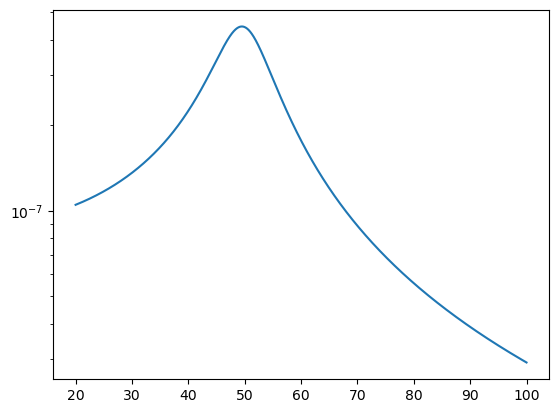

In [31]:
plt.plot(w/2/np.pi/1000, Sxx)
plt.yscale('log')